In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
#age and phys score are the features, test_results are the categories
#I want to use (1/0 passed or not)

In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

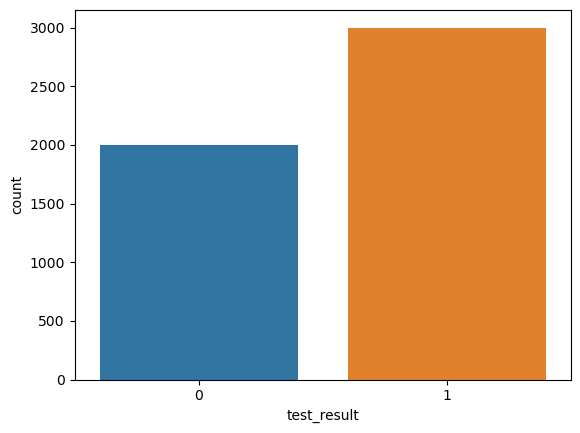

In [9]:
sns.countplot(data=df, x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

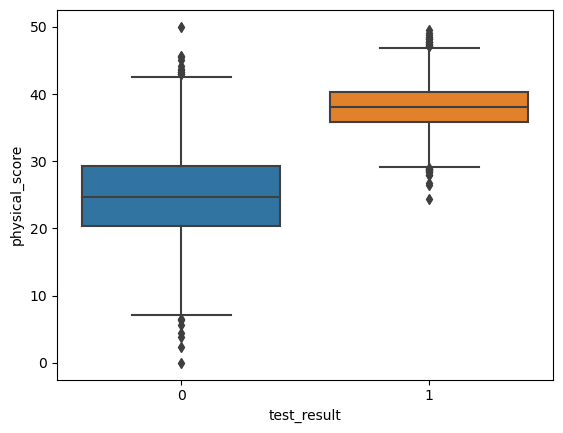

In [11]:
sns.boxplot(x='test_result', y='physical_score', data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

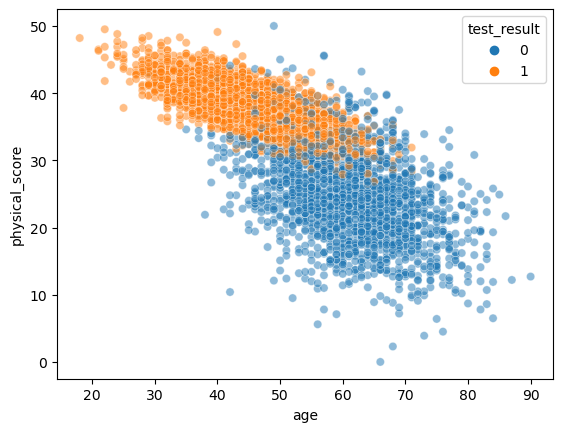

In [15]:
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result', alpha=0.5)

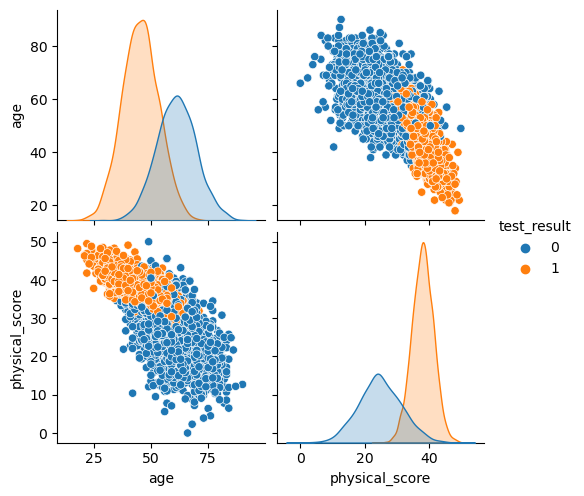

In [16]:
 sns.pairplot(df, hue='test_result')

<AxesSubplot:>

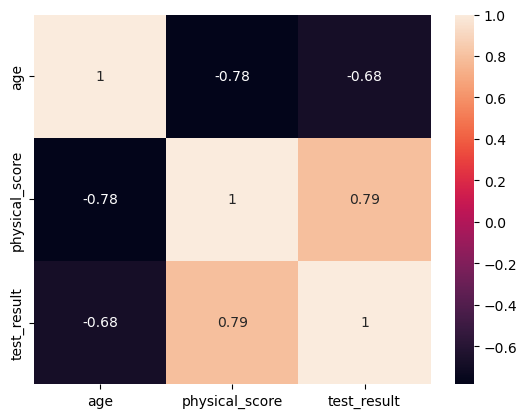

In [17]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

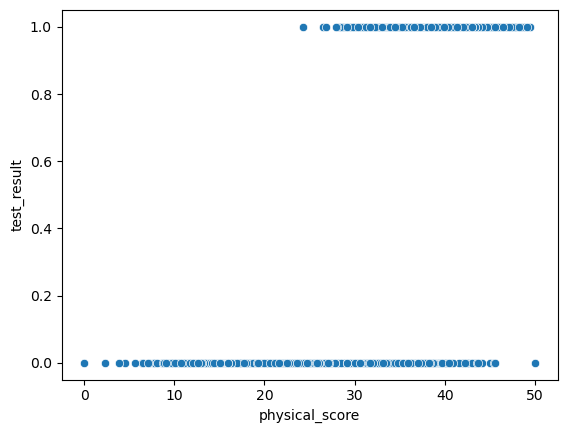

In [19]:
sns.scatterplot(data=df, x='physical_score', y='test_result')

In [20]:
#I want a 3D rapresentation to better understand this

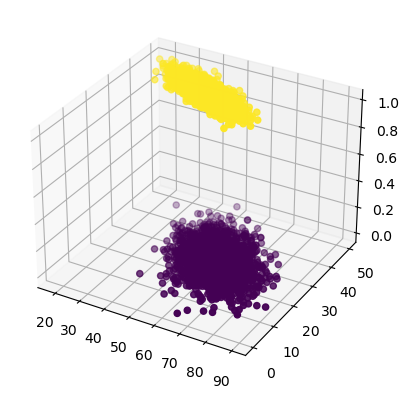

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'], c=df['test_result'])

In [27]:
X = df.drop(['test_result'], axis=1)

In [28]:
y = df['test_result']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [32]:
scaler = StandardScaler()

In [33]:
scaled_X_train = scaler.fit_transform(X_train)

In [36]:
scaled_X_test = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [39]:
#C is the parameter which you search the best fit for, so you run multiple times

In [40]:
log_model = LogisticRegression()

In [41]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [42]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [43]:
y_pred = log_model.predict(scaled_X_test)

In [44]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [45]:
#I can show the probability instead

In [47]:
y_pred = log_model.predict_proba(scaled_X_test)

In [49]:
y_pred
#this shows the prob of each element in y_pred to be 0 or 1

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [50]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [51]:
#look for logistic metrics:
#Accuracy is not a good metric due to false positive/negative, since a small
#number of data allows for high accuracy
#we can use recall, precision and ROC

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
y_pred = log_model.predict(scaled_X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.93

In [57]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [58]:
#21 and 14 are false pos, false neg

In [61]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

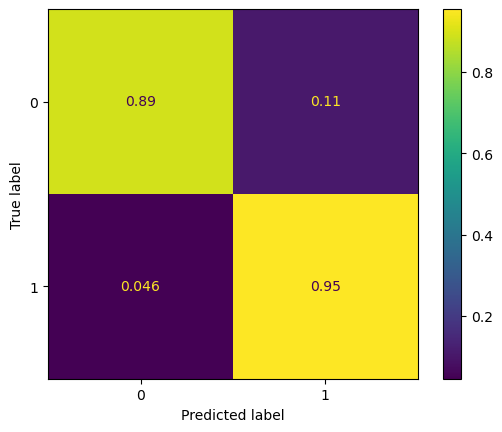

In [64]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, normalize='true')

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [67]:
from sklearn.metrics import precision_score, recall_score

In [69]:
print(precision_score(y_test,y_pred))

0.9331210191082803


In [70]:
recall_score(y_test,y_pred)

0.9543973941368078

In [71]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

C:\Users\00006258\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


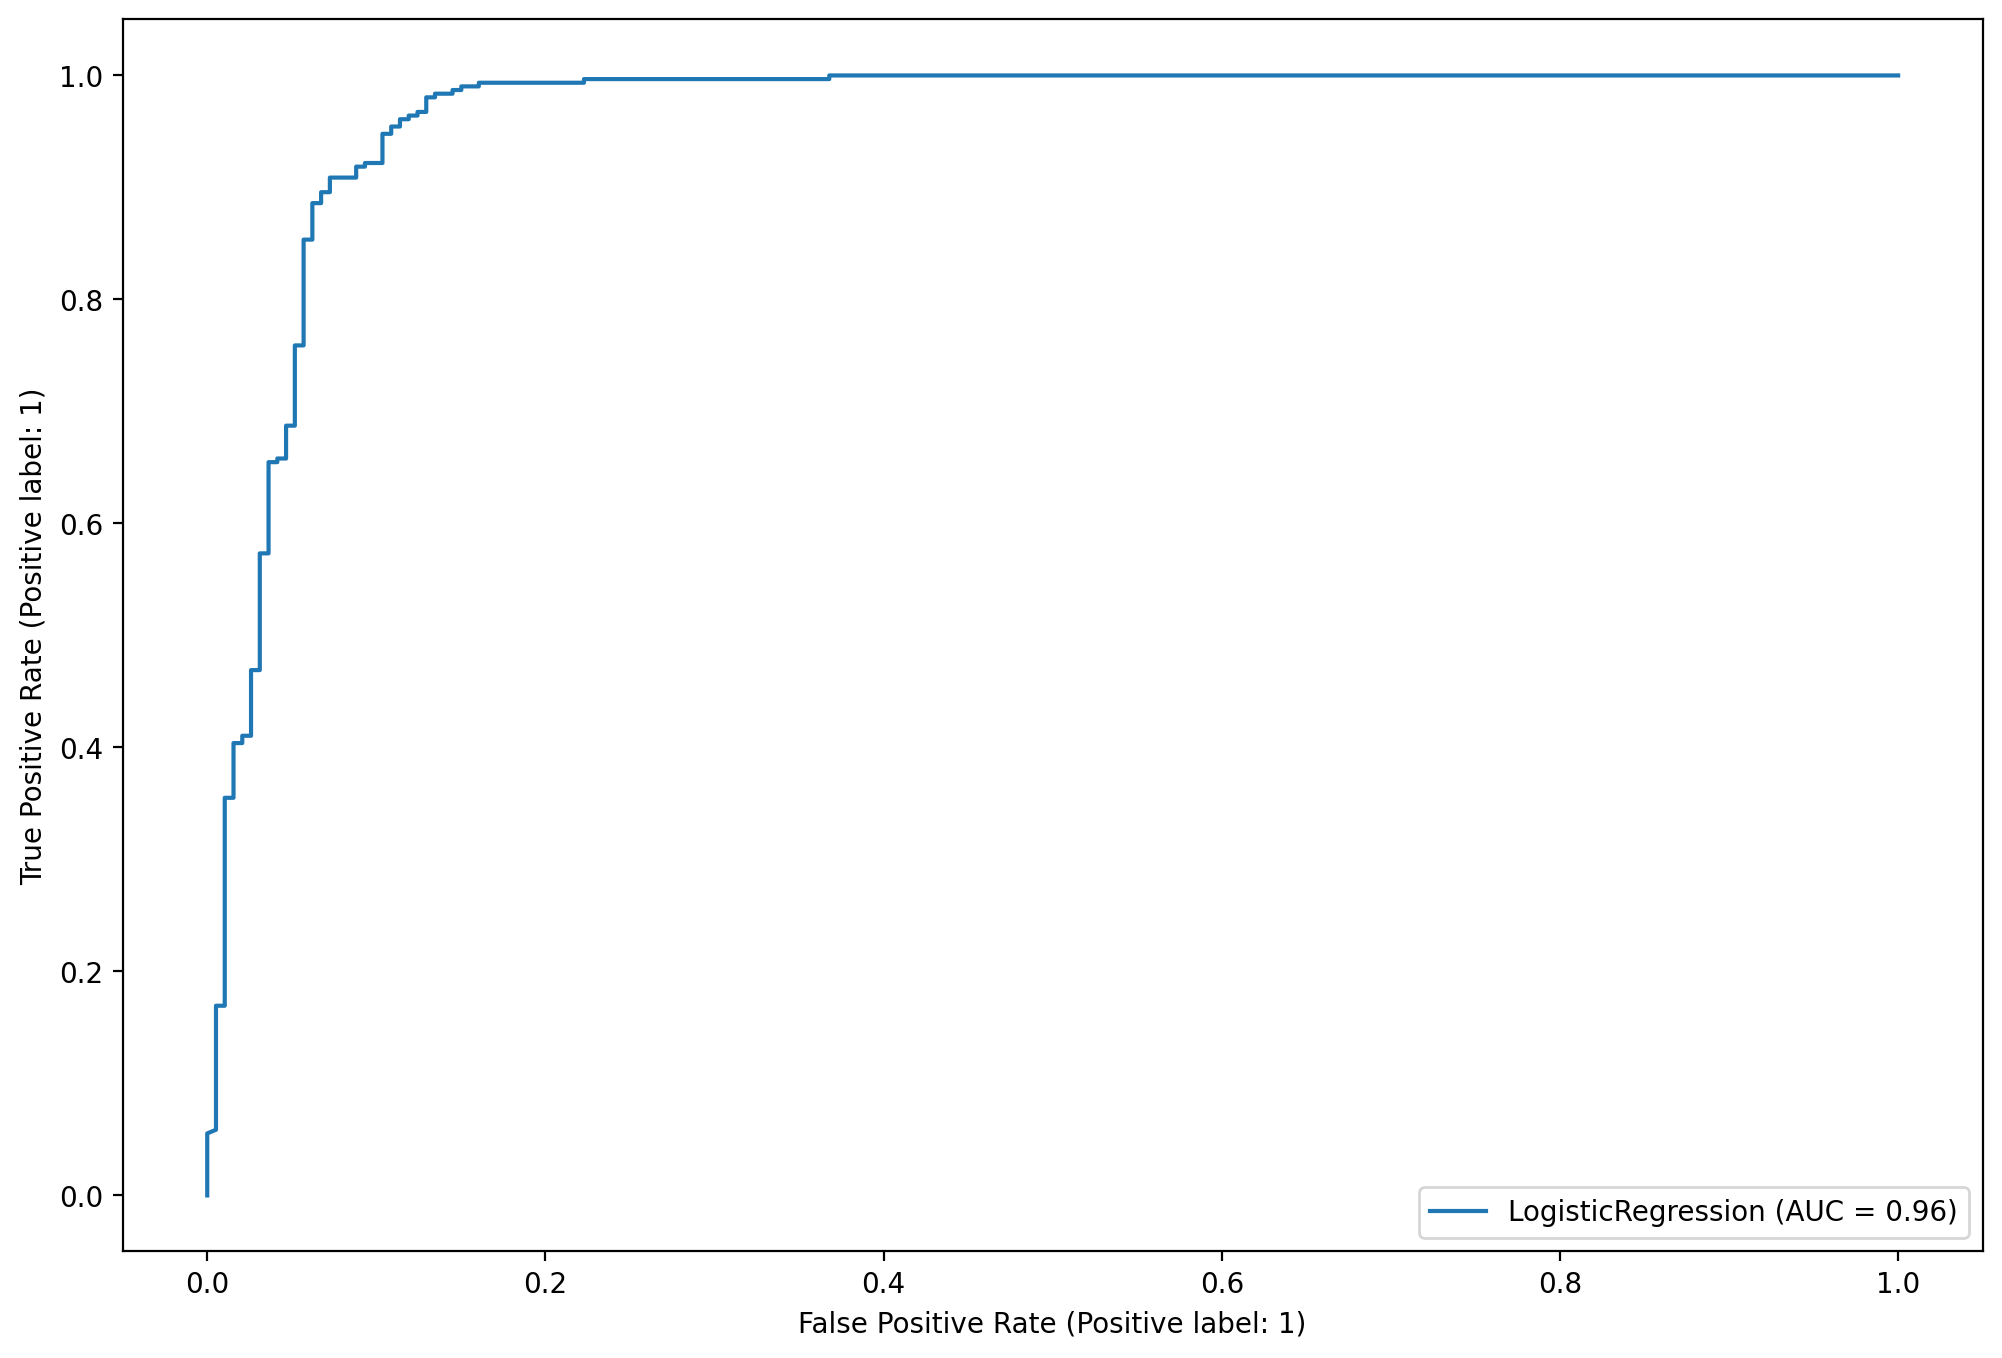

In [73]:
fig,ax=plt.subplots(figsize=(12,8), dpi=200)
plot_roc_curve(log_model, scaled_X_test, y_test, ax=ax)

C:\Users\00006258\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


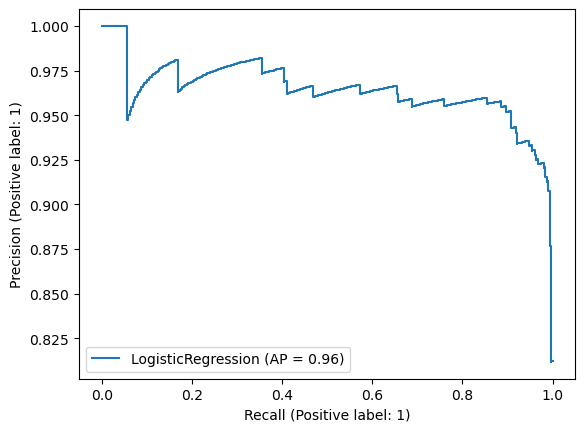

In [74]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)

In [76]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [77]:
y_test[0]

1